# Практическая работа 3 (стр. 136, вариант №1, задание №8)

## 0. Условие задачи

Дифференциальная задача:

\begin{equation*}
 \begin{cases}
   \frac{du}{dt} + \frac{du}{dx} = e^t; 0 < t \le 1, 0 < x \le 1,\\
   u(x, 0) = x + 1; u(0, t) = e^t - t.
 \end{cases}
\end{equation*}

Разностная схема:

\begin{equation*}
 D_h = \{(x_l,t^n):x_l=hl,hL=1,l=\overline{0,L};t^n=n\tau;\tau N=1,n=\overline{0,N}\},\\
 \begin{cases}
  u_{l}^{n+1}=u_{l}^{n}-\frac{\tau}{h}(u_{l}^{n}-u_{l-1}^{n})+\tau e^{t^n},l=\overline{1,L},n=\overline{0,N-1},\\
  u_{l}^{0}=x_{l}+1,l=\overline{0,L};u_{0}^{n}=e^{t^n}-t^n,n=\overline{0,N}.
 \end{cases}
\end{equation*}
 
$\underline{Задание.}$ 
1) Изобразить шаблон разностной схемы.

2) Для предложенной разностной схемы найти условие устойчивости, пользуясь спектральным признаком (и, в случае уравнения с непостоянными коэффициентами, принципом «замороженных коэффициентов»).

3) Исследовать схему на аппроксимацию.

4) Вычислить решение $u(t, x)$ при трёх различных значениях шагов $\tau, h: (\tau_1, h_1)$ не удовлетворяющих условию сходимости, $(\tau_2, h_2)$, удовлетворяющих условию сходимости и $(\tau_3, h_3) = (\frac{\tau_2}{2}, \frac{h_2}{2})$.

5) Построить графики решений $u(t, x), u(x), u(t)$ и сравнить их при разных значениях шагов сетки.

## 1. Шаблон разностной схемы

Имеем:

\begin{equation*}
  \frac{u_{l}^{n+1}-u_{l}^{n}}{\tau}+\frac{u_{l}^{n}-u_{l-1}^{n}}{h}=e^{t^n}.
\end{equation*}

![title](images/scheme/scheme.png)

## 2. Условие устойчивости

Сделаем замену для шаблона:

\begin{equation*}
  u_{l}^{n}=\lambda^n e^{i\alpha l}.
\end{equation*}

Имеем:

\begin{equation*}
  \frac{\lambda-1}{\tau}+\frac{1-e^{-i\alpha}}{h}=0;\\
  \lambda=1-\frac{\tau}{h}+\frac{\tau}{h}e^{-i\alpha};\\
  |\lambda| \le 1 - спектральный \; признак \; устойчивости =>\\
  => \alpha = \frac{\tau}{h} \le 1 => схема \; устойчива.
  \end{equation*}

## 3. Исследование схемы на аппроксимацию

\begin{equation*}
  r_{\tau h}=u'_t + u'_x - \frac{u_{l}^{n}+\tau(u_{l}^{n})'_t + o(\tau^2) - u_{l}^{n}}{\tau} 
  - \frac{u_{l}^{n} - u_{l}^{n} + h(u_{l}^{n})'_x + o(h^2)}{h} = o(\tau, h).
\end{equation*}

## 4. Решение

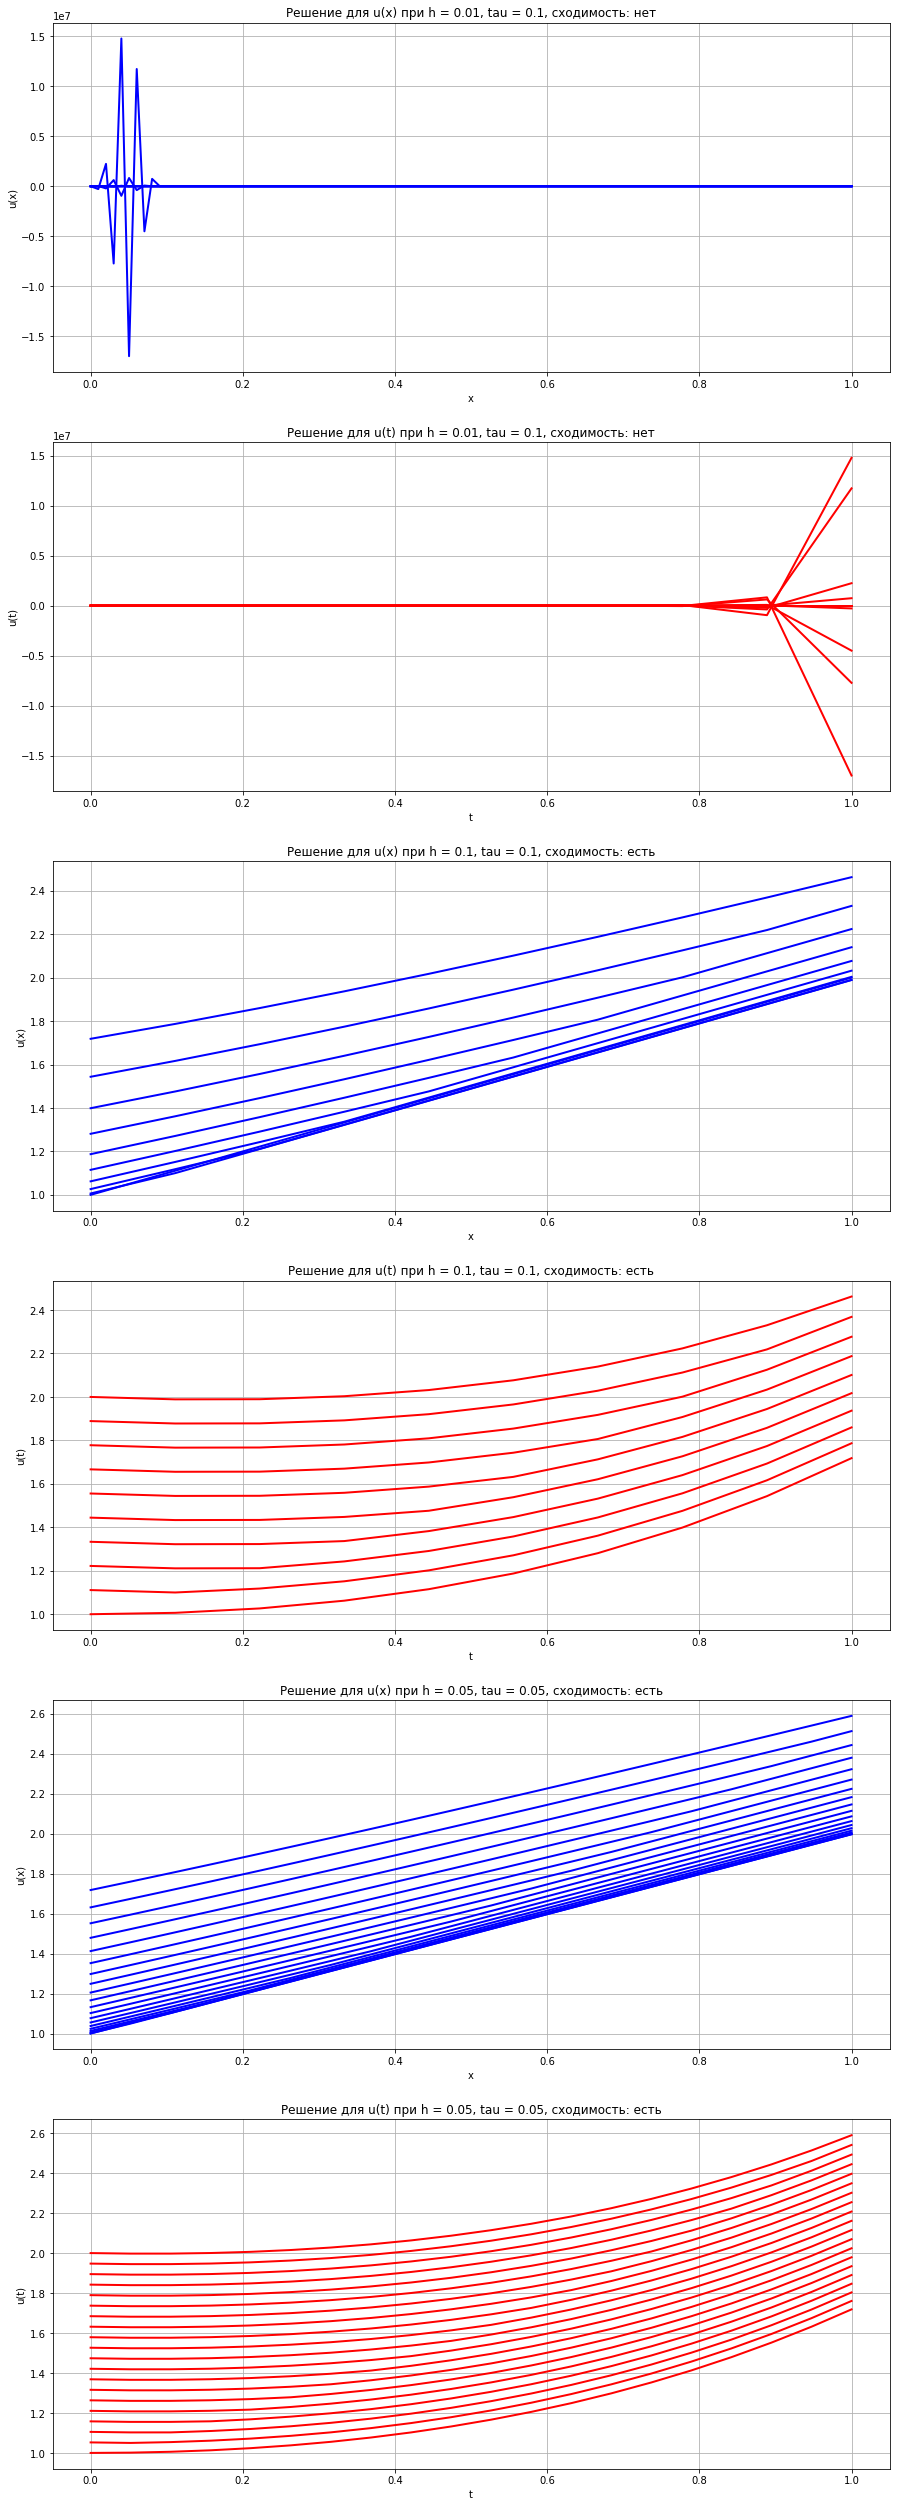

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# variables
h_tau = [[10**-2, 10**-1],[10**-1, 10**-1],[5*10**-2, 5*10**-2]]

len_h_tau = len(h_tau)

# drawing improvements
scale_y = 1.5;
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = len_h_tau*scale_y*5*2 #height
plt.rcParams["figure.figsize"] = fig_size


# constants
x_min = 0
x_max = 1
t_min = 0
t_max = 1

cycles = 1
for [h,tau] in h_tau:
    N_x = int((x_max - x_min) / h)
    N_t = int((t_max - t_min) / tau)

    u = np.zeros((N_t, N_x))

    x = np.linspace(x_min, x_max, num=N_x)
    t = np.linspace(t_min, t_max, num=N_t)

    for i in range(0, N_x):
        u[0][i] = x[i] + 1

    for i in range(0, N_t):
        u[i][0] = np.exp(t[i]) - t[i]

    for i in range(0, N_t-1):
        for j in range(1, N_x):
            u[i+1][j] = u[i][j] - tau / h * (u[i][j] - u[i][j-1]) + tau*np.exp(t[i])

    ax = plt.subplot(len_h_tau*2, 1, cycles)
    plt.plot(x, u.transpose(), color='blue', linewidth=2.0)
    ax.set_title(f"Решение для u(x) при h = {h}, tau = {tau}, сходимость: {'есть' if (tau/h<=1) else 'нет'}")
    ax.set_xlabel('x')
    ax.set_ylabel('u(x)')
    plt.grid()

    ax = plt.subplot(len_h_tau*2, 1, cycles+1)
    plt.plot(t, u, color='red', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при h = {h}, tau = {tau}, сходимость: {'есть' if (tau/h<=1) else 'нет'}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    plt.grid()
                 
    cycles += 2

plt.savefig('images/results/1.png')

## 5. Различные параметры сеток

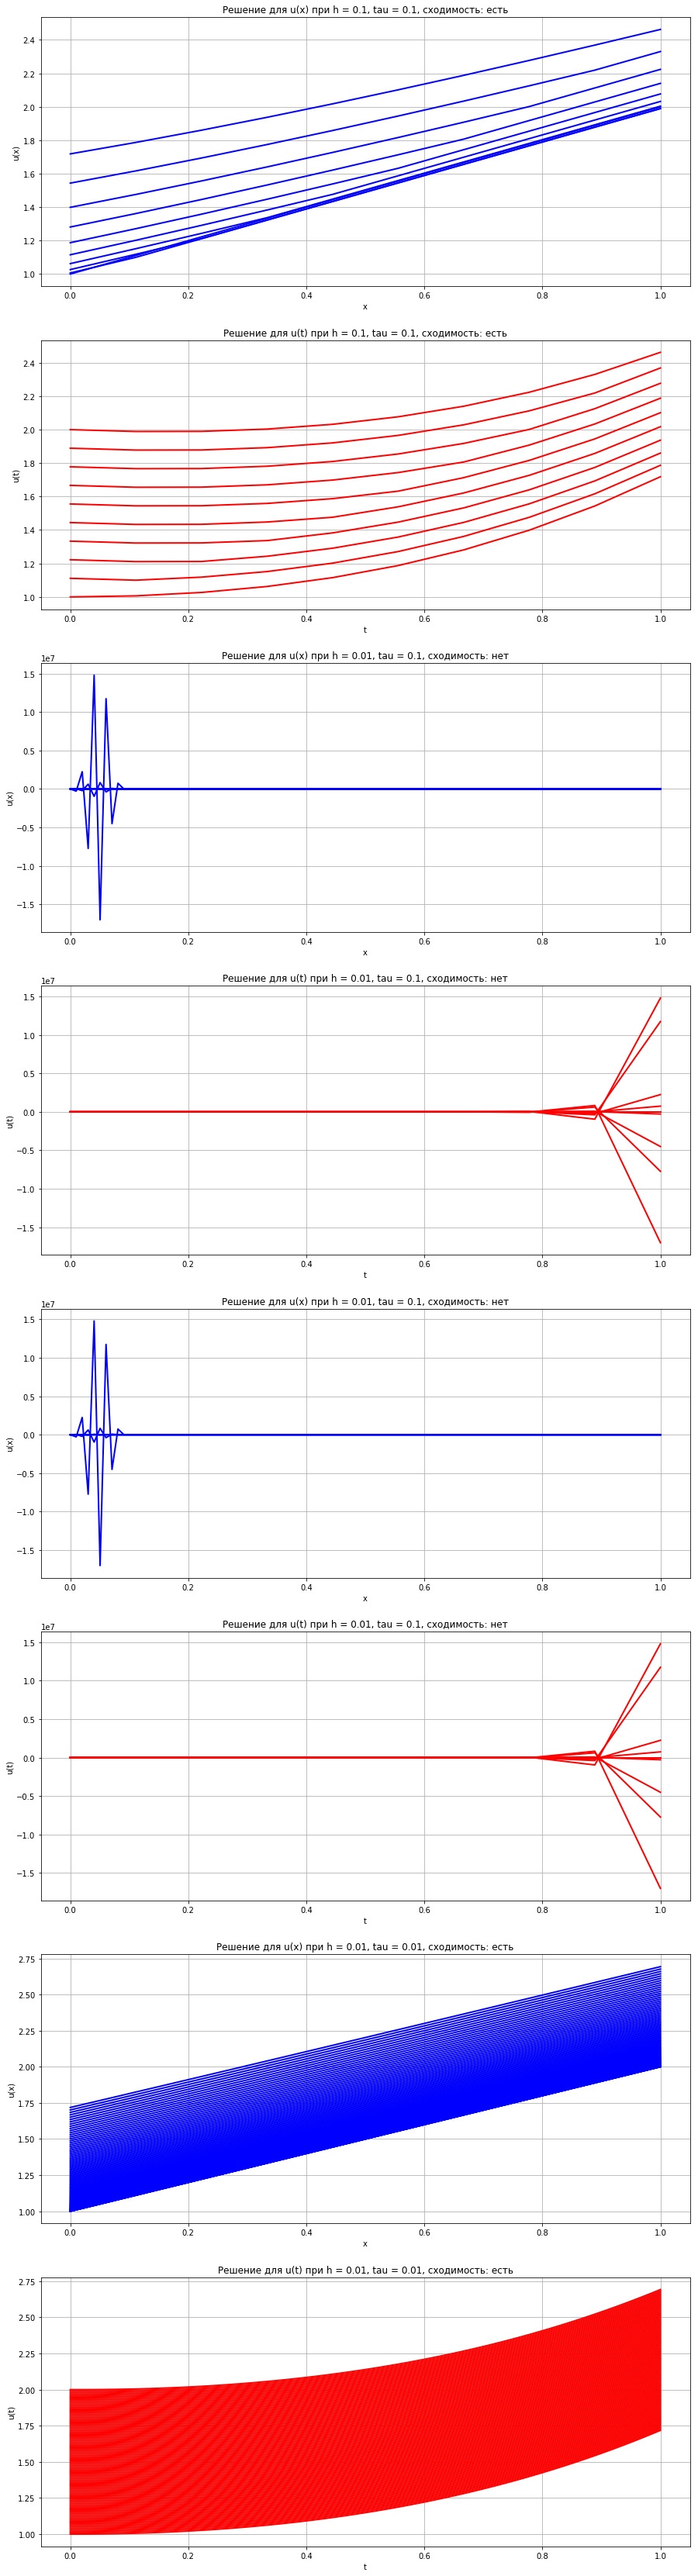

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# variables
h_tau = [[10**-1, 10**-1],[10**-2, 10**-1],[10**-2, 10**-1],[10**-2, 10**-2]]

len_h_tau = len(h_tau)

# drawing improvements
scale_y = 1.5;
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = len_h_tau*scale_y*5*2 #height
plt.rcParams["figure.figsize"] = fig_size


# constants
x_min = 0
x_max = 1
t_min = 0
t_max = 1

cycles = 1
for [h,tau] in h_tau:
    N_x = int((x_max - x_min) / h)
    N_t = int((t_max - t_min) / tau)

    u = np.zeros((N_t, N_x))

    x = np.linspace(x_min, x_max, num=N_x)
    t = np.linspace(t_min, t_max, num=N_t)

    for i in range(0, N_x):
        u[0][i] = x[i] + 1

    for i in range(0, N_t):
        u[i][0] = np.exp(t[i]) - t[i]

    for i in range(0, N_t-1):
        for j in range(1, N_x):
            u[i+1][j] = u[i][j] - tau / h * (u[i][j] - u[i][j-1]) + tau*np.exp(t[i])

    ax = plt.subplot(len_h_tau*2, 1, cycles)
    plt.plot(x, u.transpose(), color='blue', linewidth=2.0)
    ax.set_title(f"Решение для u(x) при h = {h}, tau = {tau}, сходимость: {'есть' if (tau/h<=1) else 'нет'}")
    ax.set_xlabel('x')
    ax.set_ylabel('u(x)')
    plt.grid()

    ax = plt.subplot(len_h_tau*2, 1, cycles+1)
    plt.plot(t, u, color='red', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при h = {h}, tau = {tau}, сходимость: {'есть' if (tau/h<=1) else 'нет'}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    plt.grid()
                 
    cycles += 2

plt.savefig('images/results/2.png')